In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(22,8.27)})

# Plotting Utilities

In [2]:
def plot(df, column, smoothing=1,ax=None):
    rounds = len(df)
    clients = list(df[column])
    for client in clients:
        sns.lineplot(x=range(rounds), y=df[column][client].rolling(smoothing).mean(), color='r', alpha=0.1,ax=ax)
    sns.lineplot(x=range(rounds), y=df[column].quantile(0.25, axis=1).rolling(smoothing).mean(), color='black', alpha=0.5, ax=ax)
    sns.lineplot(x=range(rounds), y=df[column].median(axis=1).rolling(smoothing).mean(), color='black', ax=ax)
    sns.lineplot(x=range(rounds), y=df[column].quantile(0.75, axis=1).rolling(smoothing).mean(), color='black', alpha=0.5, ax=ax)

In [3]:
def get_params(df):
    return set([param[0][3:] for param in list(df) if '.' in param[0] and 'l2' in param[0]])

In [4]:
def plot_l2_norms(df, smoothing=1):
    f, axes = plt.subplots(6, 2, sharex=True, figsize=(30,20))
    for param, (i,j) in zip(get_params(df),zip(list(range(6))*2, [0]*6 + [1] *6)):
        plot(df, "l2_"+param, smoothing=smoothing, ax=axes[i,j])
        axes[i, j].set_title(param)
    for ax in axes.flat:
        ax.set(xlabel='Round', ylabel='L2 Norm')
    plt.subplots_adjust(hspace=0.5)

In [5]:
def plot_cosine_similarity(df, smoothing=1):
    f, axes = plt.subplots(6, 2, sharex=True, figsize=(30,20))
    for param, (i,j) in zip(get_params(df),zip(list(range(6))*2, [0]*6 + [1] *6)):
        plot(df, "avg_cosine_"+param, smoothing=smoothing, ax=axes[i,j])
        axes[i, j].set_title(param)
    for ax in axes.flat:
        ax.set(xlabel='Round', ylabel='Avg Cosine Similarity')
    plt.subplots_adjust(hspace=0.5)

In [26]:
benchmark_100 = pd.read_csv('benchmark_100_clients.csv')
E_1 = pd.read_csv('METRICS_clients_100_q_100_epoch_1_lr_0.01.csv', header=[0,1])
E_2 = pd.read_csv('METRICS_clients_100_q_100_epoch_2_lr_0.01.csv', header=[0,1])
E_5 = pd.read_csv('METRICS_clients_100_q_100_epoch_5_lr_0.01.csv', header=[0,1])

# Comparison

## Top-3 Accuracy

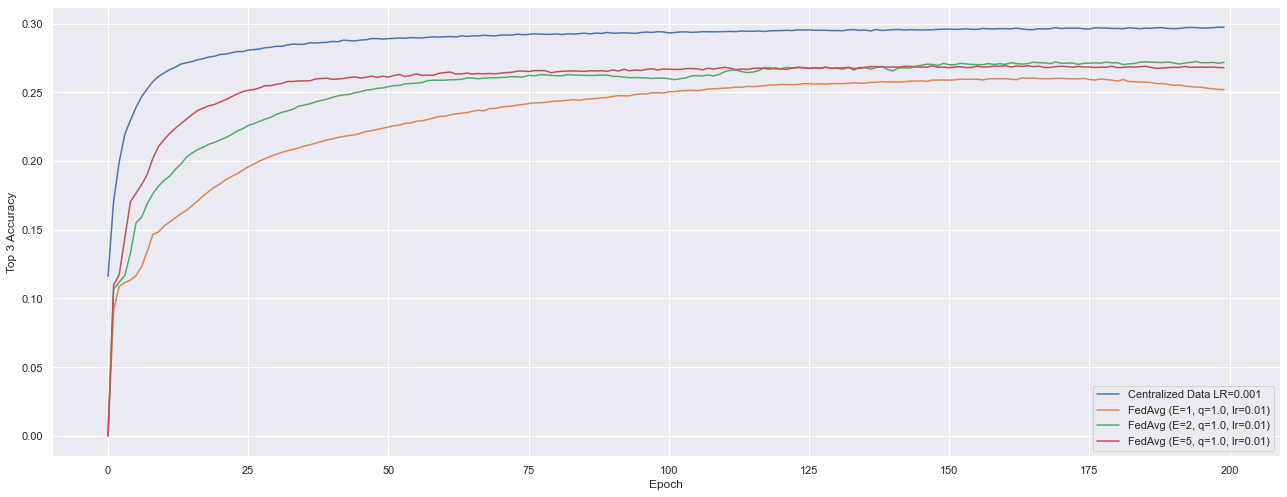

In [33]:
sns.lineplot(x=range(200), y=benchmark_100['test_acc'], label='Centralized Data LR=0.001')
sns.lineplot(x=range(200), y=E_1['pre_test_acc'].mean(axis=1)[:200], label='FedAvg (E=1, q=1.0, lr=0.01)')
sns.lineplot(x=range(200), y=E_2['pre_test_acc'].mean(axis=1)[:200], label='FedAvg (E=2, q=1.0, lr=0.01)')
sns.lineplot(x=range(200), y=E_5['pre_test_acc'].mean(axis=1)[:200], label='FedAvg (E=5, q=1.0, lr=0.01)')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Top 3 Accuracy')
plt.show()

## Test Loss

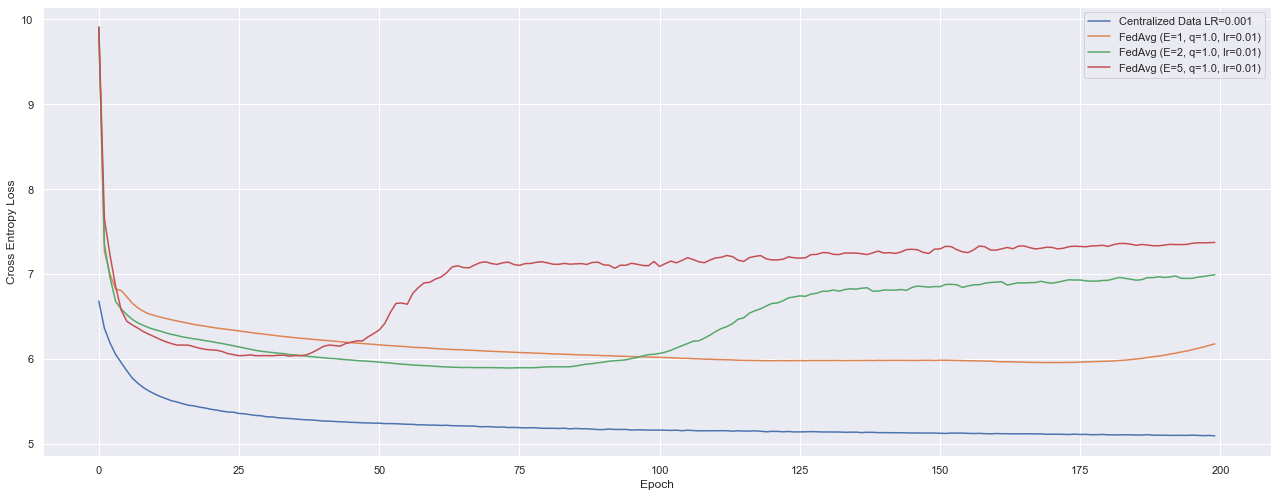

In [29]:
sns.lineplot(x=range(200), y=benchmark_100['test_loss'], label='Centralized Data LR=0.001')
sns.lineplot(x=range(200), y=E_1['pre_test_loss'].mean(axis=1)[:200], label='FedAvg (E=1, q=1.0, lr=0.01)')
sns.lineplot(x=range(200), y=E_2['pre_test_loss'].mean(axis=1)[:200], label='FedAvg (E=2, q=1.0, lr=0.01)')
sns.lineplot(x=range(200), y=E_5['pre_test_loss'].mean(axis=1)[:200], label='FedAvg (E=5, q=1.0, lr=0.01)')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()

## Train Loss

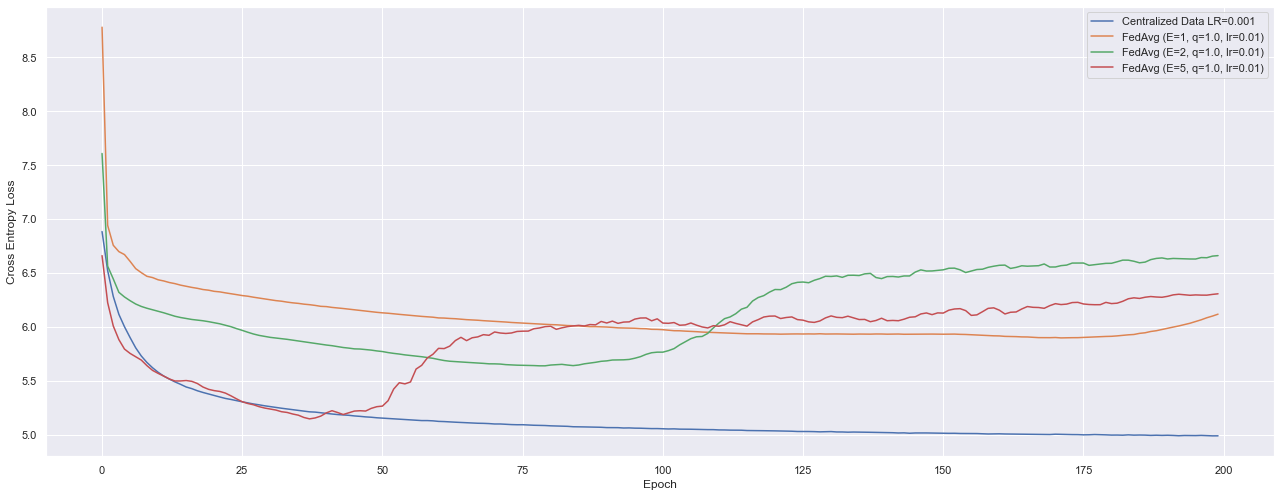

In [30]:
sns.lineplot(x=range(200), y=benchmark_100['train_loss'], label='Centralized Data LR=0.001')
sns.lineplot(x=range(200), y=E_1['train_loss'].mean(axis=1)[:200], label='FedAvg (E=1, q=1.0, lr=0.01)')
sns.lineplot(x=range(200), y=E_2['train_loss'].mean(axis=1)[:200], label='FedAvg (E=2, q=1.0, lr=0.01)')
sns.lineplot(x=range(200), y=E_5['train_loss'].mean(axis=1)[:200], label='FedAvg (E=5, q=1.0, lr=0.01)')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()

# `FedAvg` (E=1, q=1.0, lr=0.01)

## Test Accuracy

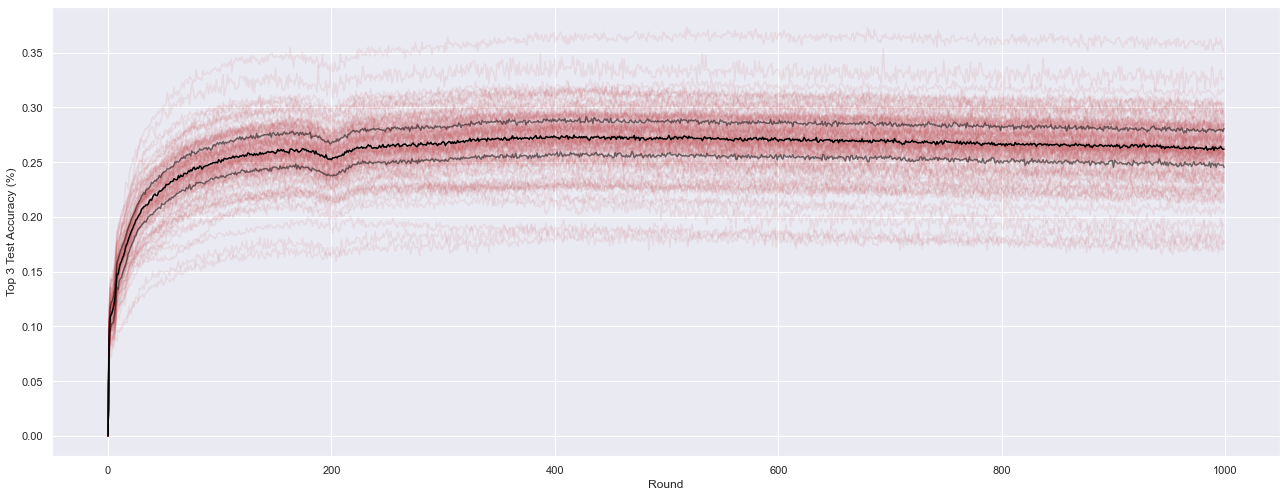

In [11]:
plot(E_1, 'pre_test_acc')
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

## Test Loss

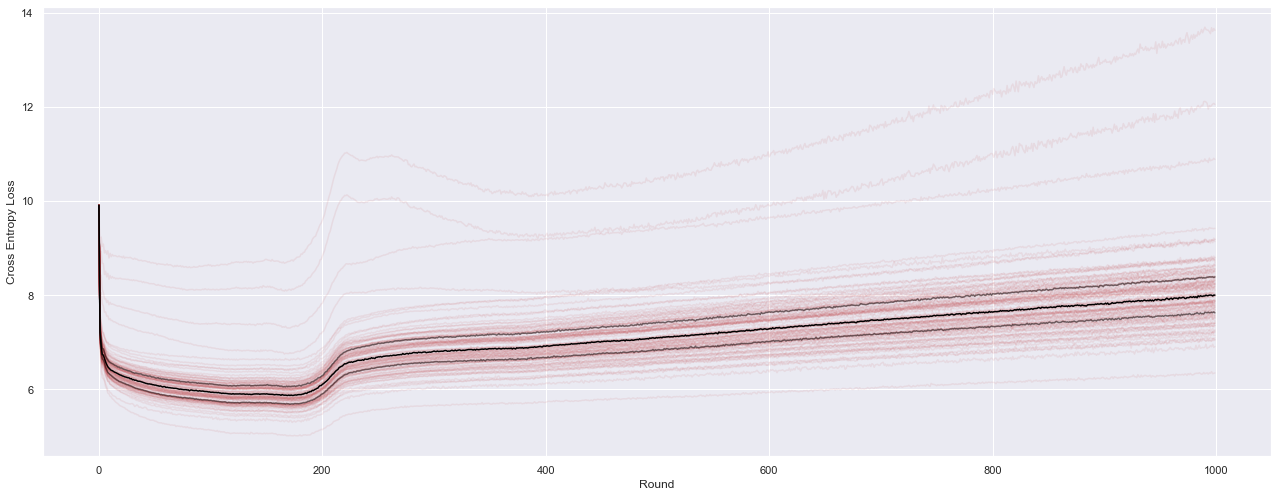

In [12]:
plot(E_1, 'pre_test_loss')
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

## Train Loss

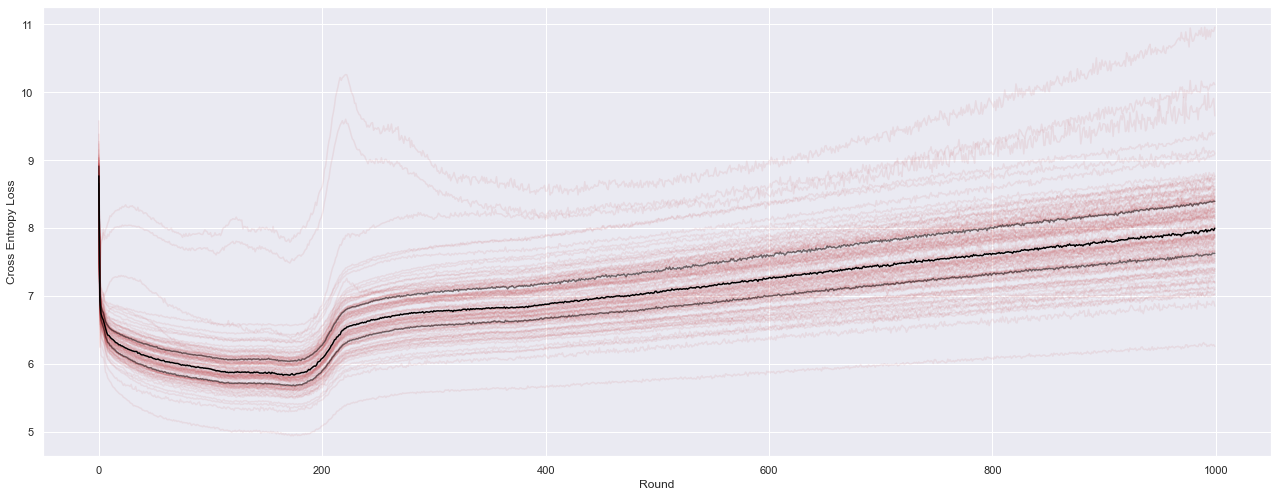

In [13]:
plot(E_1, 'train_loss')
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

## $L_2$ Norms

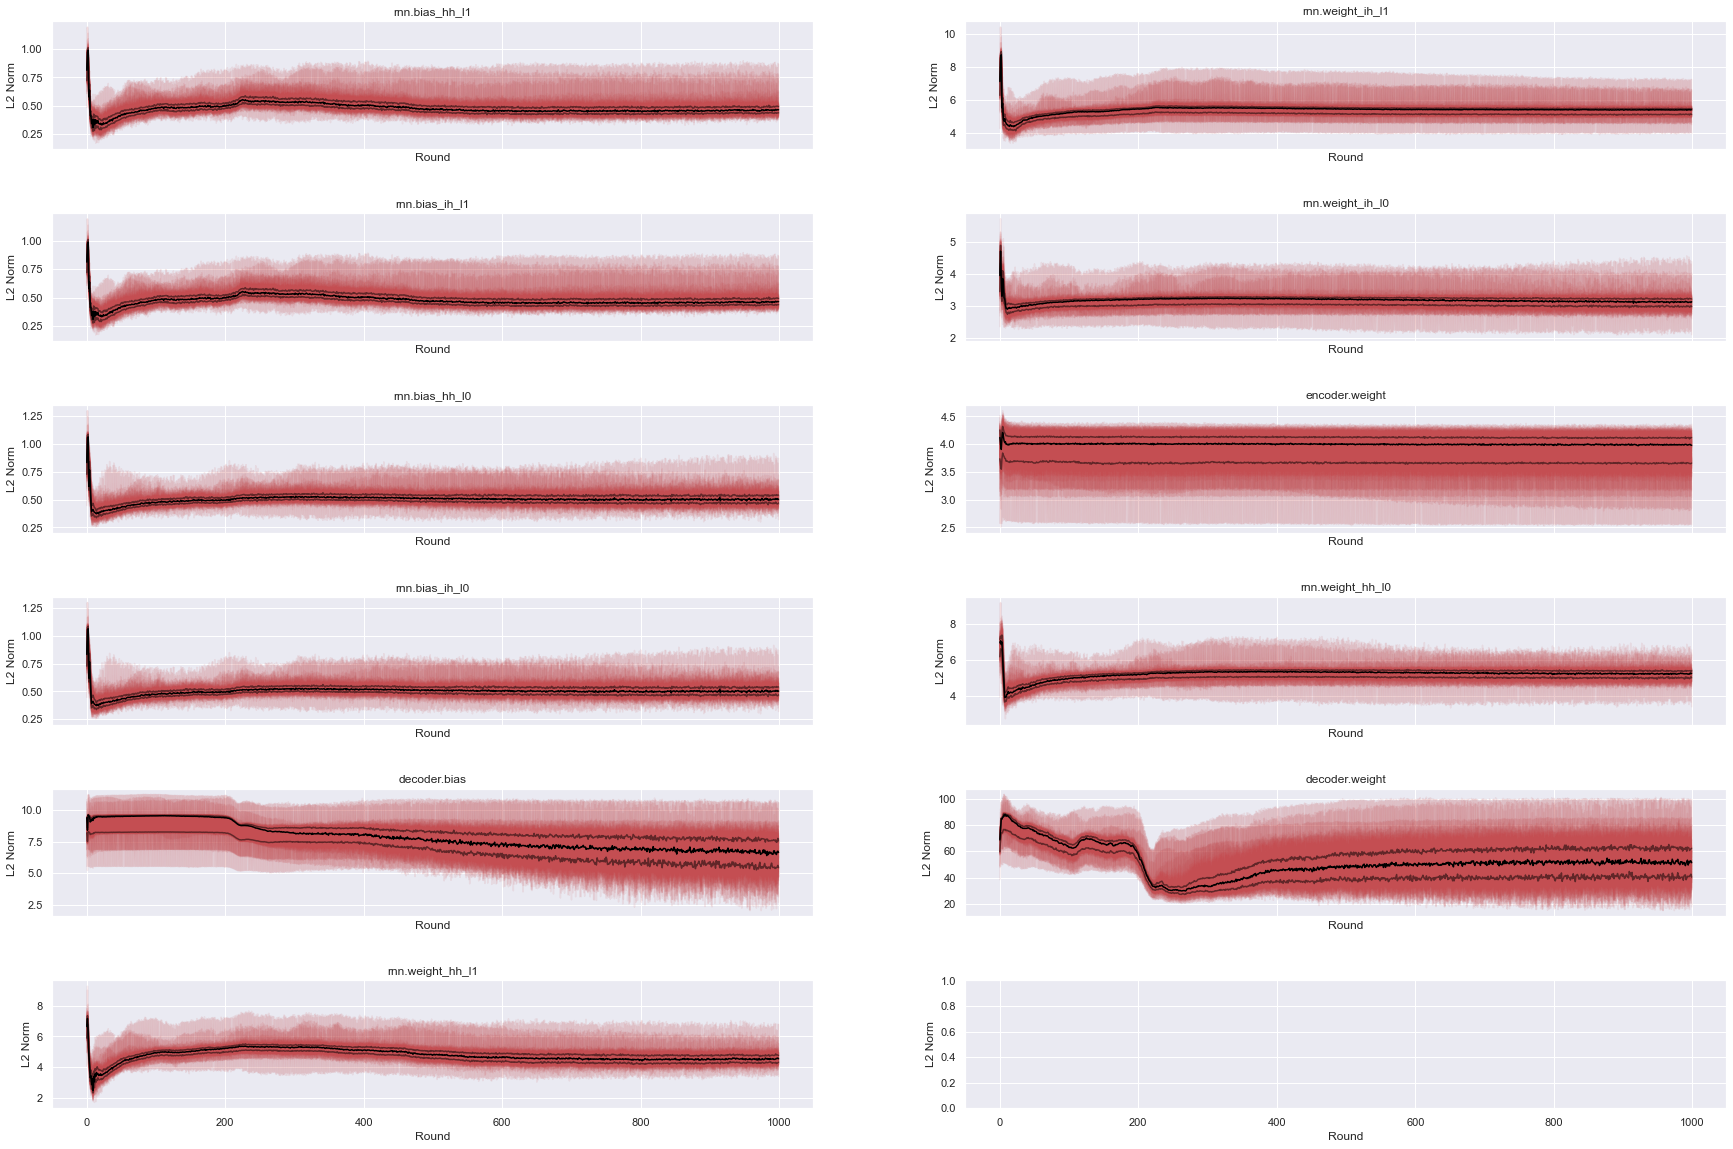

In [14]:
plot_l2_norms(E_1)

## Average Cosine Similiarities

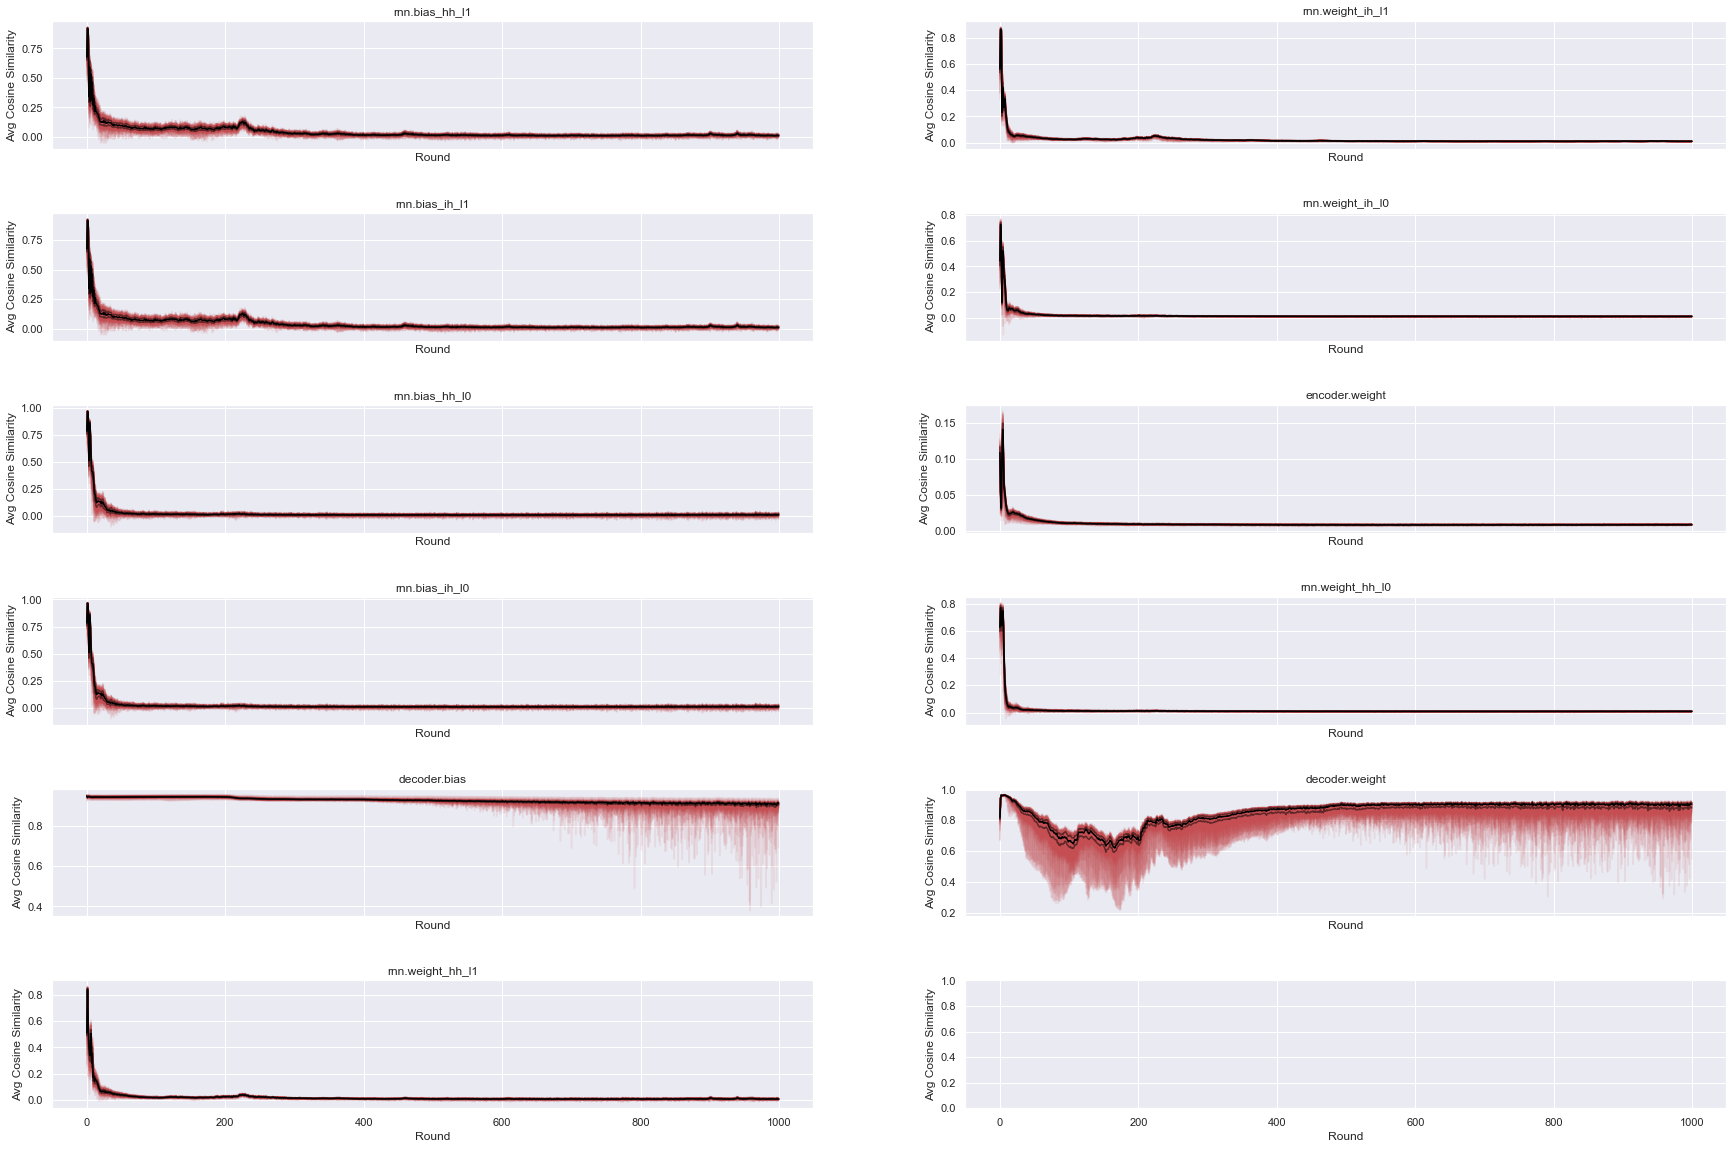

In [15]:
plot_cosine_similarity(E_1)

# `FedAvg` (E=2, q=1.0, lr=0.01)

## Pre Test Accuracy

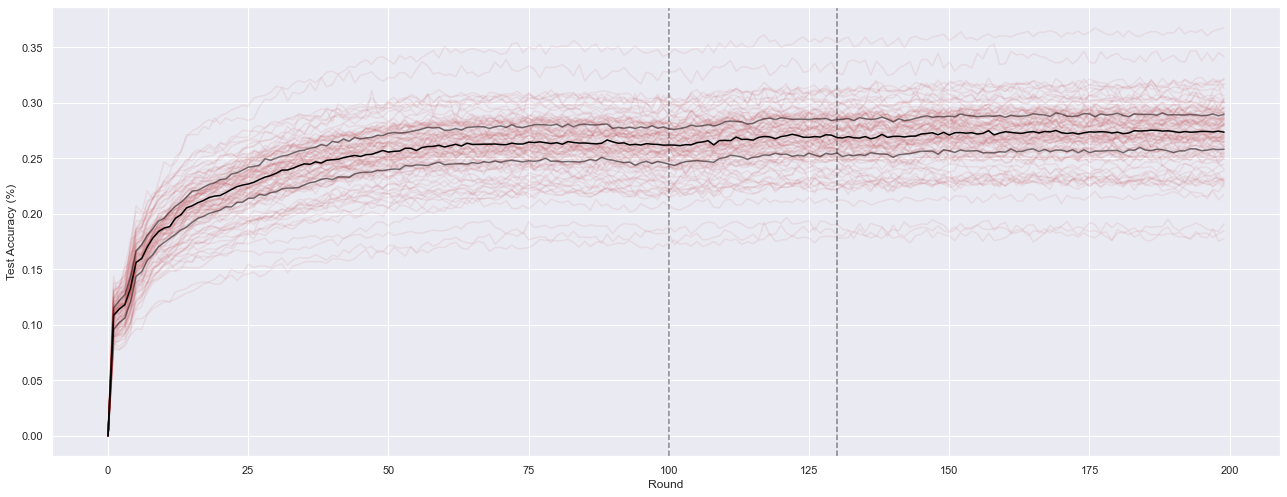

In [399]:
plot(E_2, 'pre_test_acc')z
plt.axvline(x=130,color='k', linestyle='--', alpha=0.5)
plt.xlabel('Round')
plt.ylabel('Test Accuracy (%)')
plt.show()

## Pre Test Loss

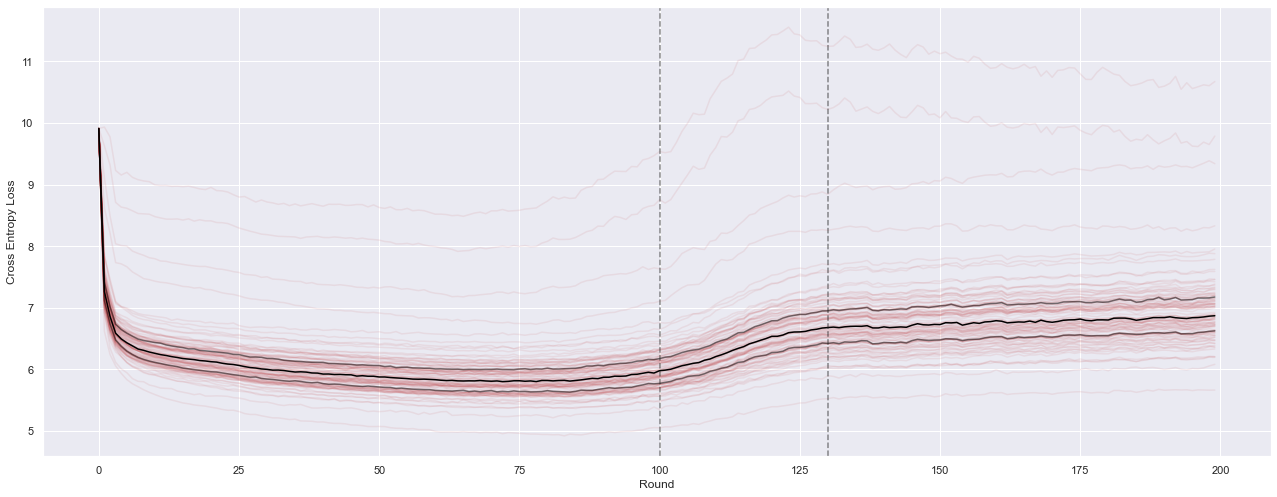

In [400]:
plot(E_2, 'pre_test_loss')
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.axvline(x=100,color='k', linestyle='--', alpha=0.5)
plt.axvline(x=130,color='k', linestyle='--', alpha=0.5)
plt.show()

## Train Loss

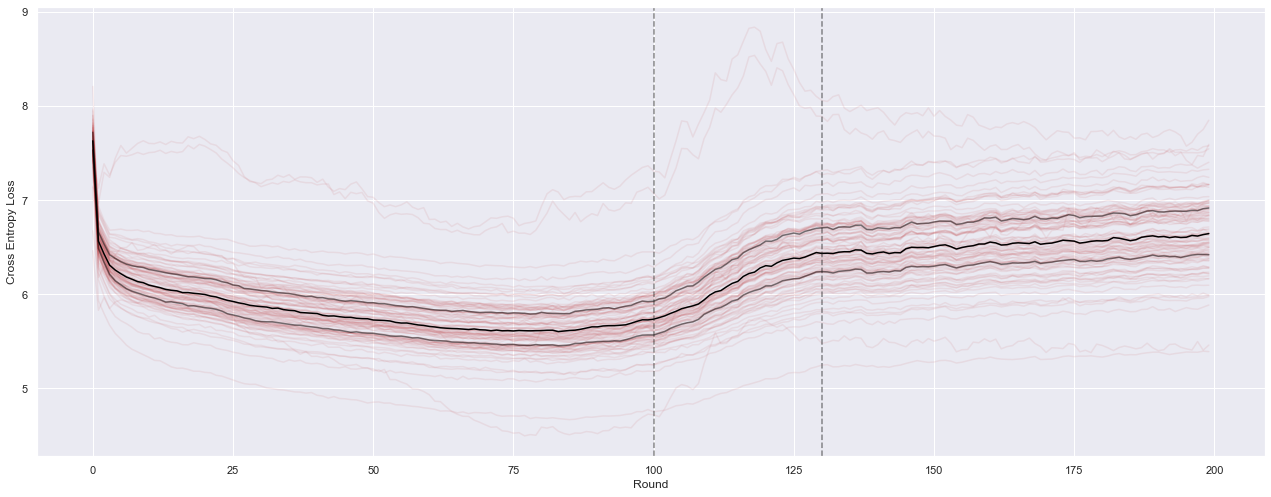

In [407]:
plot(E_2, 'train_loss')
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.axvline(x=100,color='k', linestyle='--', alpha=0.5)
plt.axvline(x=130,color='k', linestyle='--', alpha=0.5)
plt.show()

## $L_2$ Norms

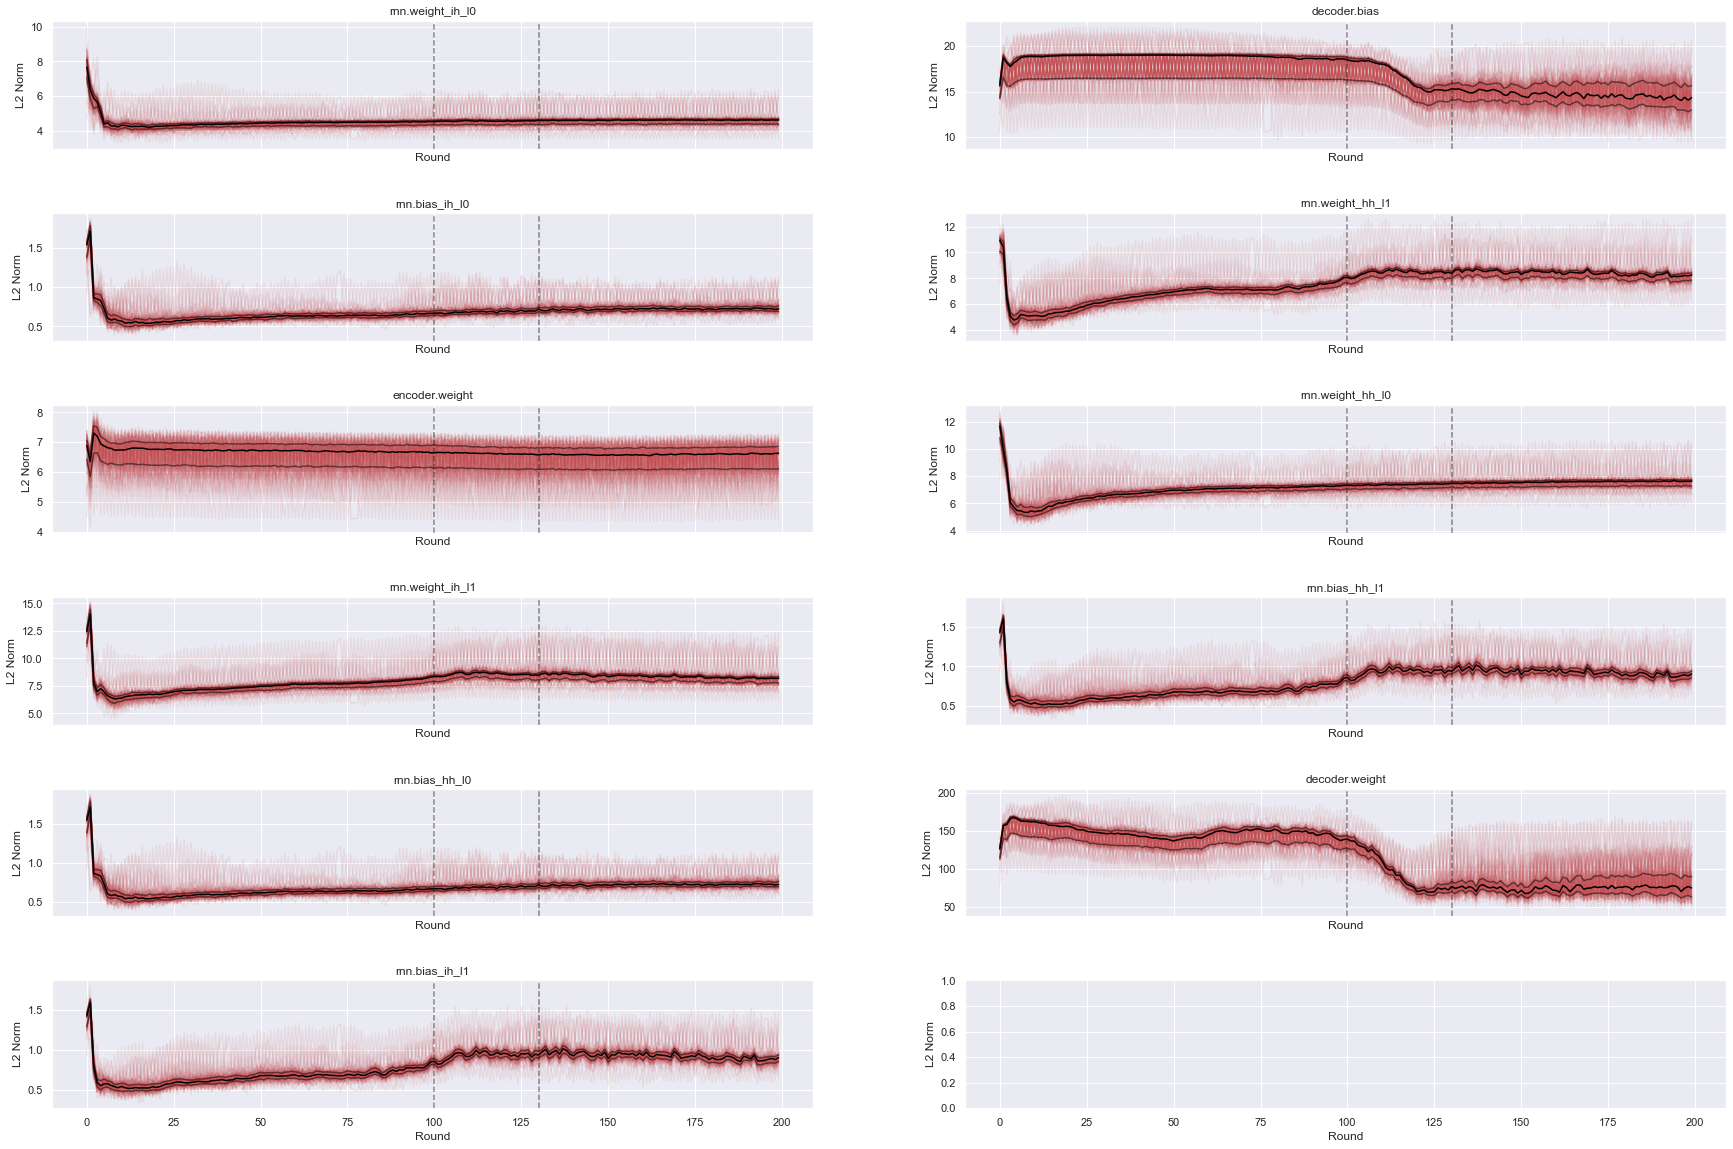

In [411]:
plot_l2_norms(E_2)

## Average Cosine Similiarities

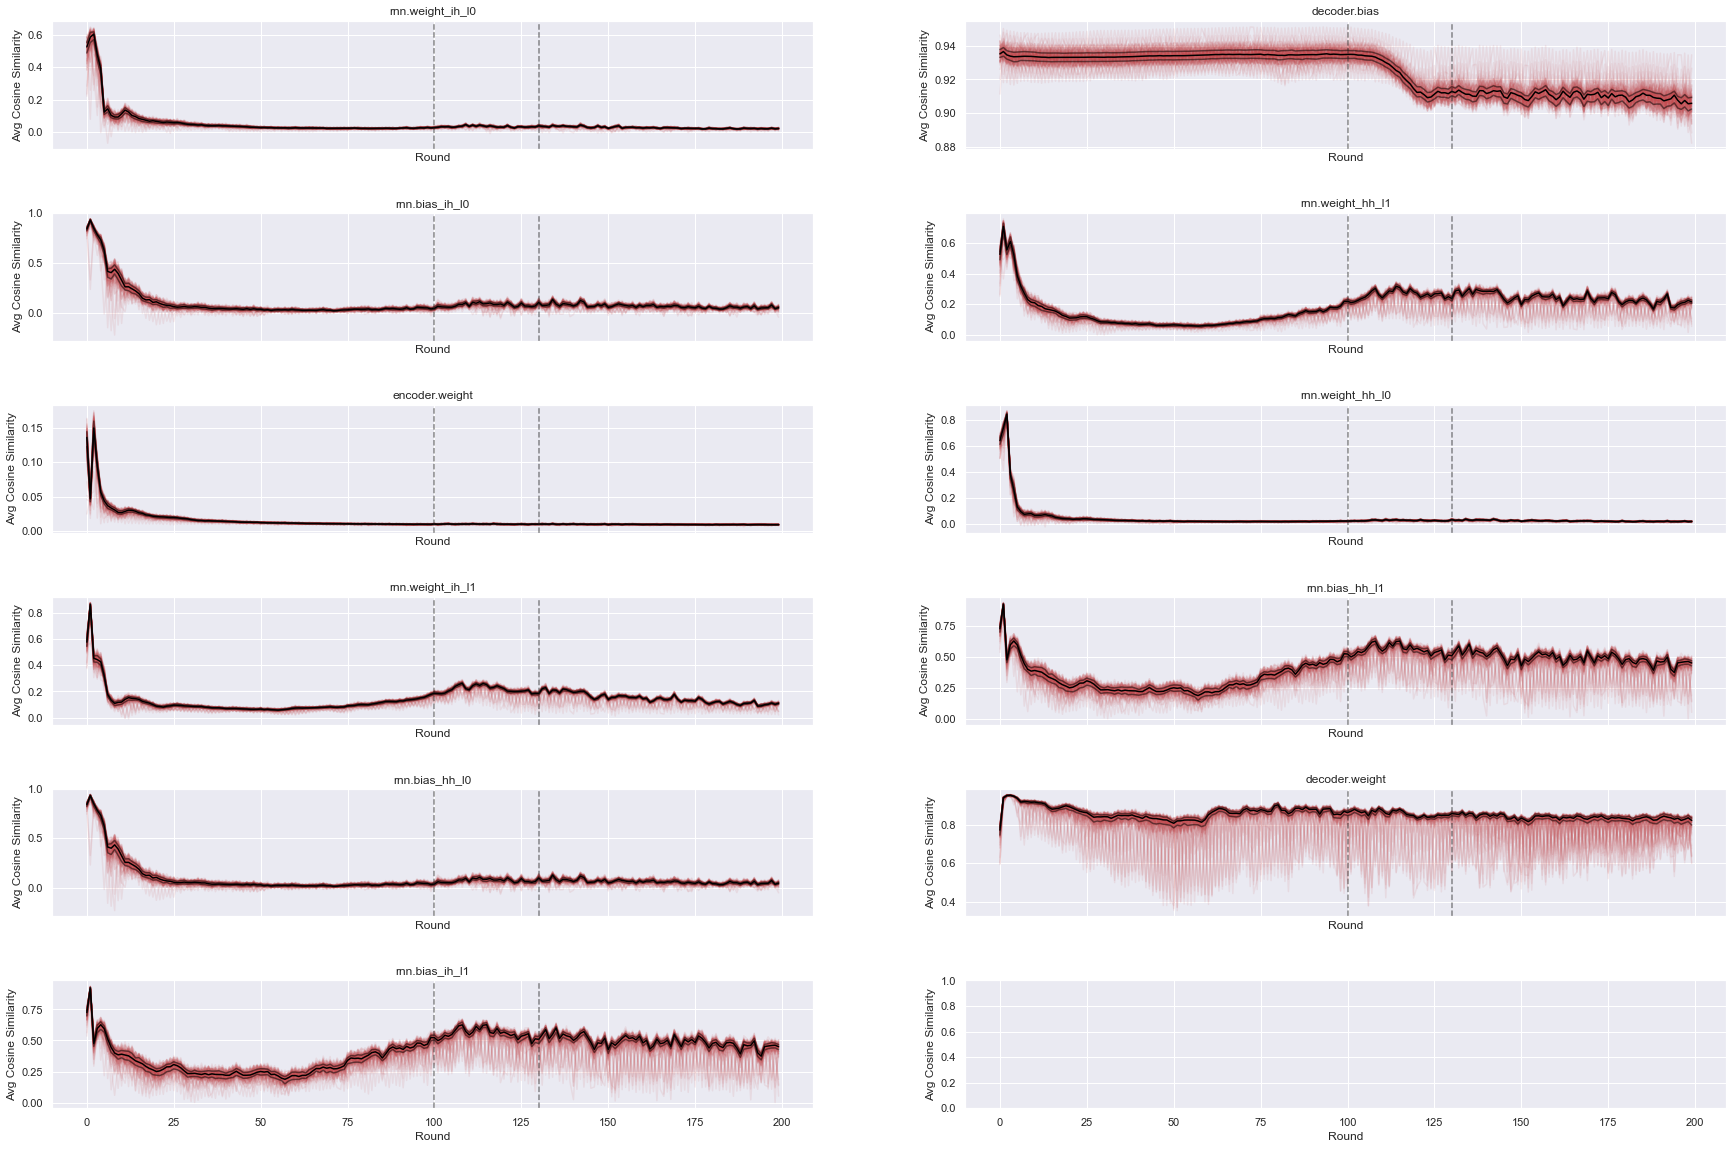

In [415]:
plot_cosine_similarity(E_2)

# `FedAvg` (E=2, q=1.0, lr=0.01)

## Test Accuracy

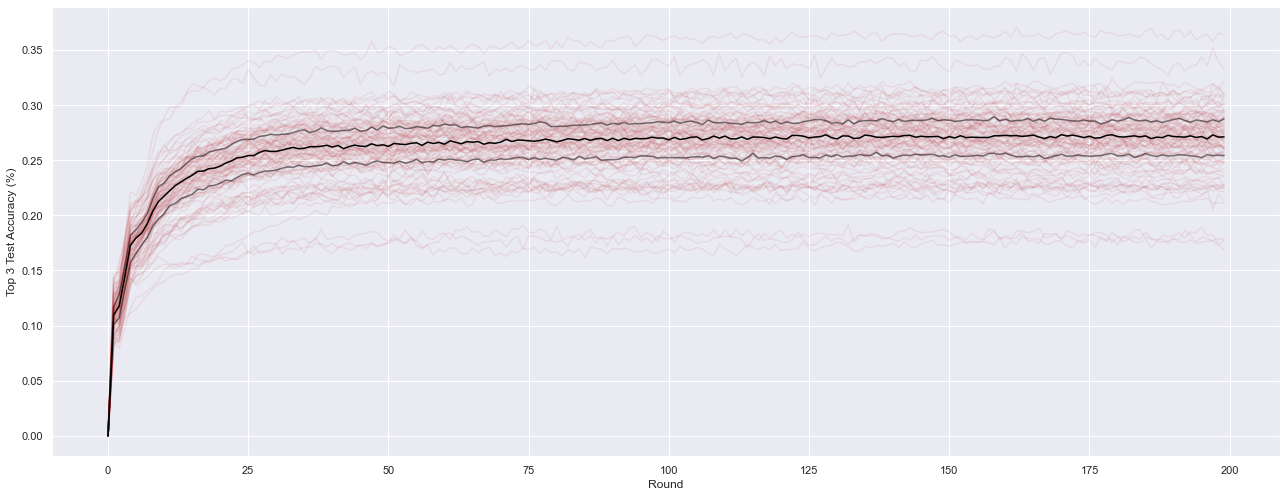

In [17]:
plot(E_5, 'pre_test_acc')
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

## Test Loss

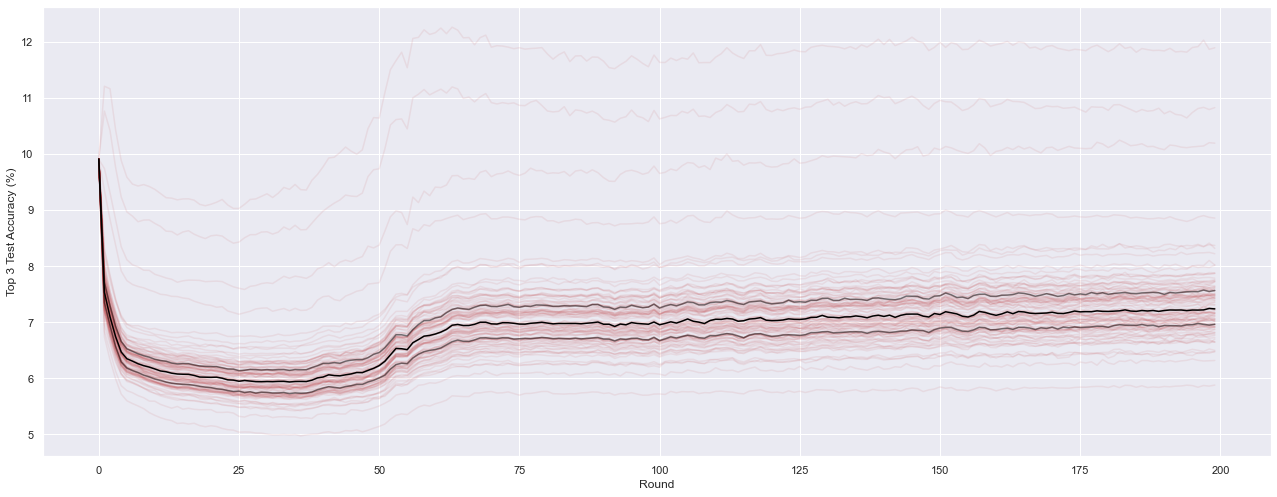

In [18]:
plot(E_5, 'pre_test_loss')
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

## Train Loss

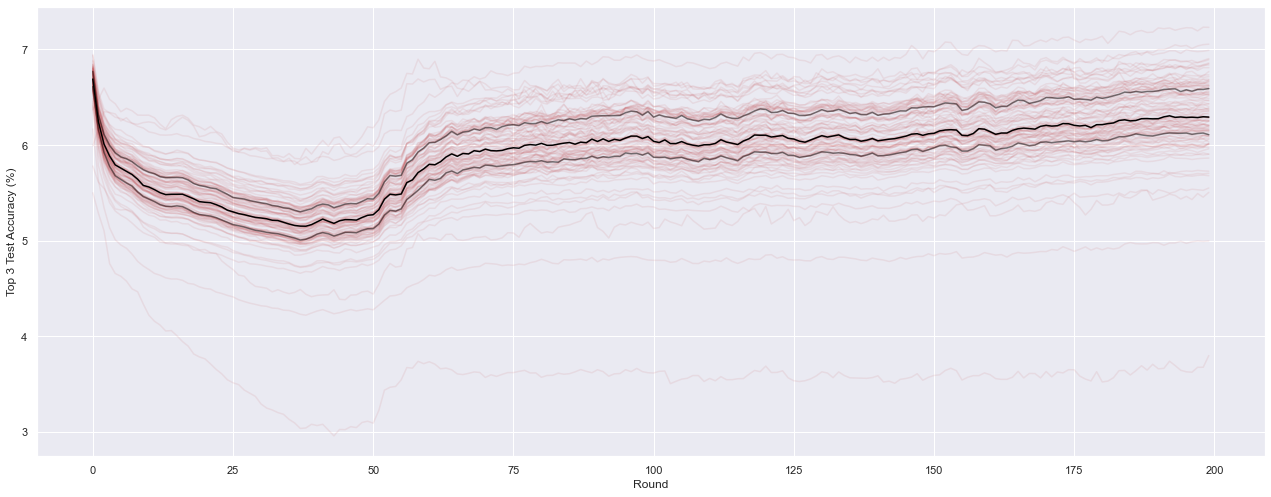

In [20]:
plot(E_5, 'train_loss')
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

## $L_2$ Norms

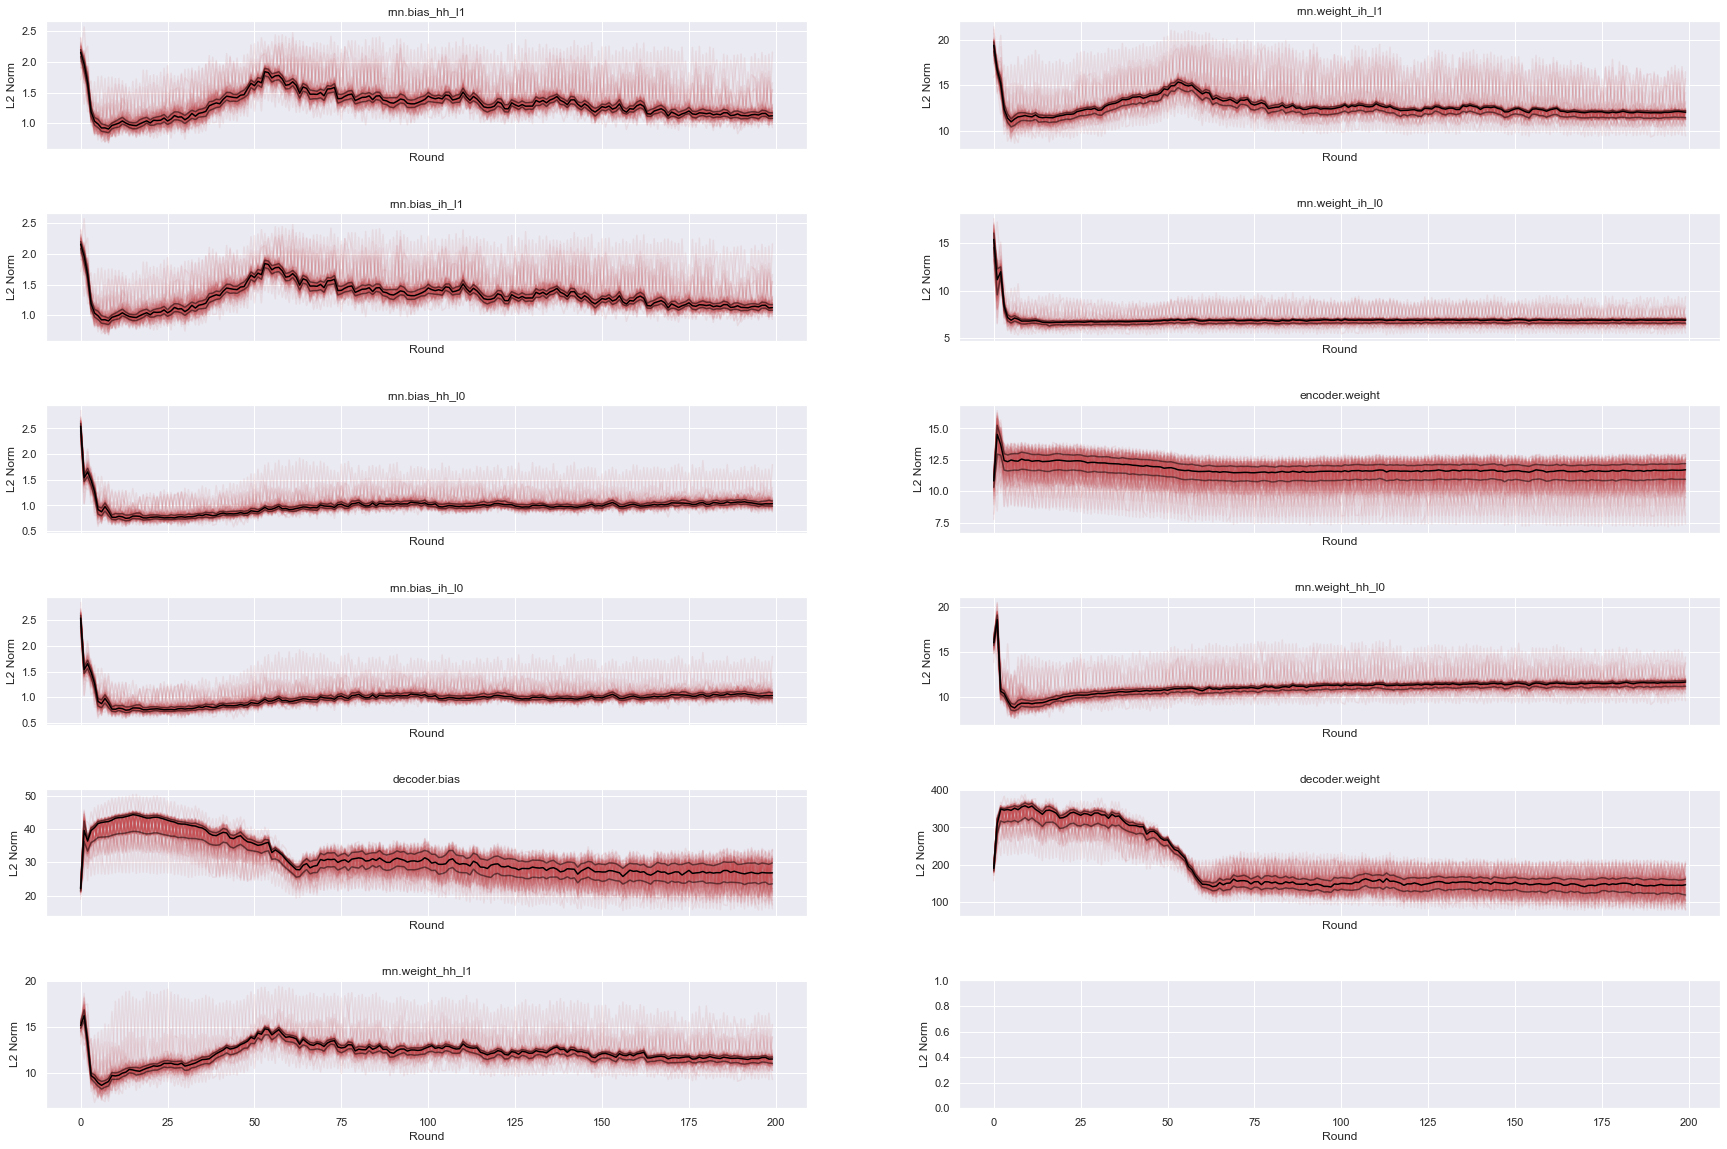

In [21]:
plot_l2_norms(E_5)

## Average Cosine Similarity

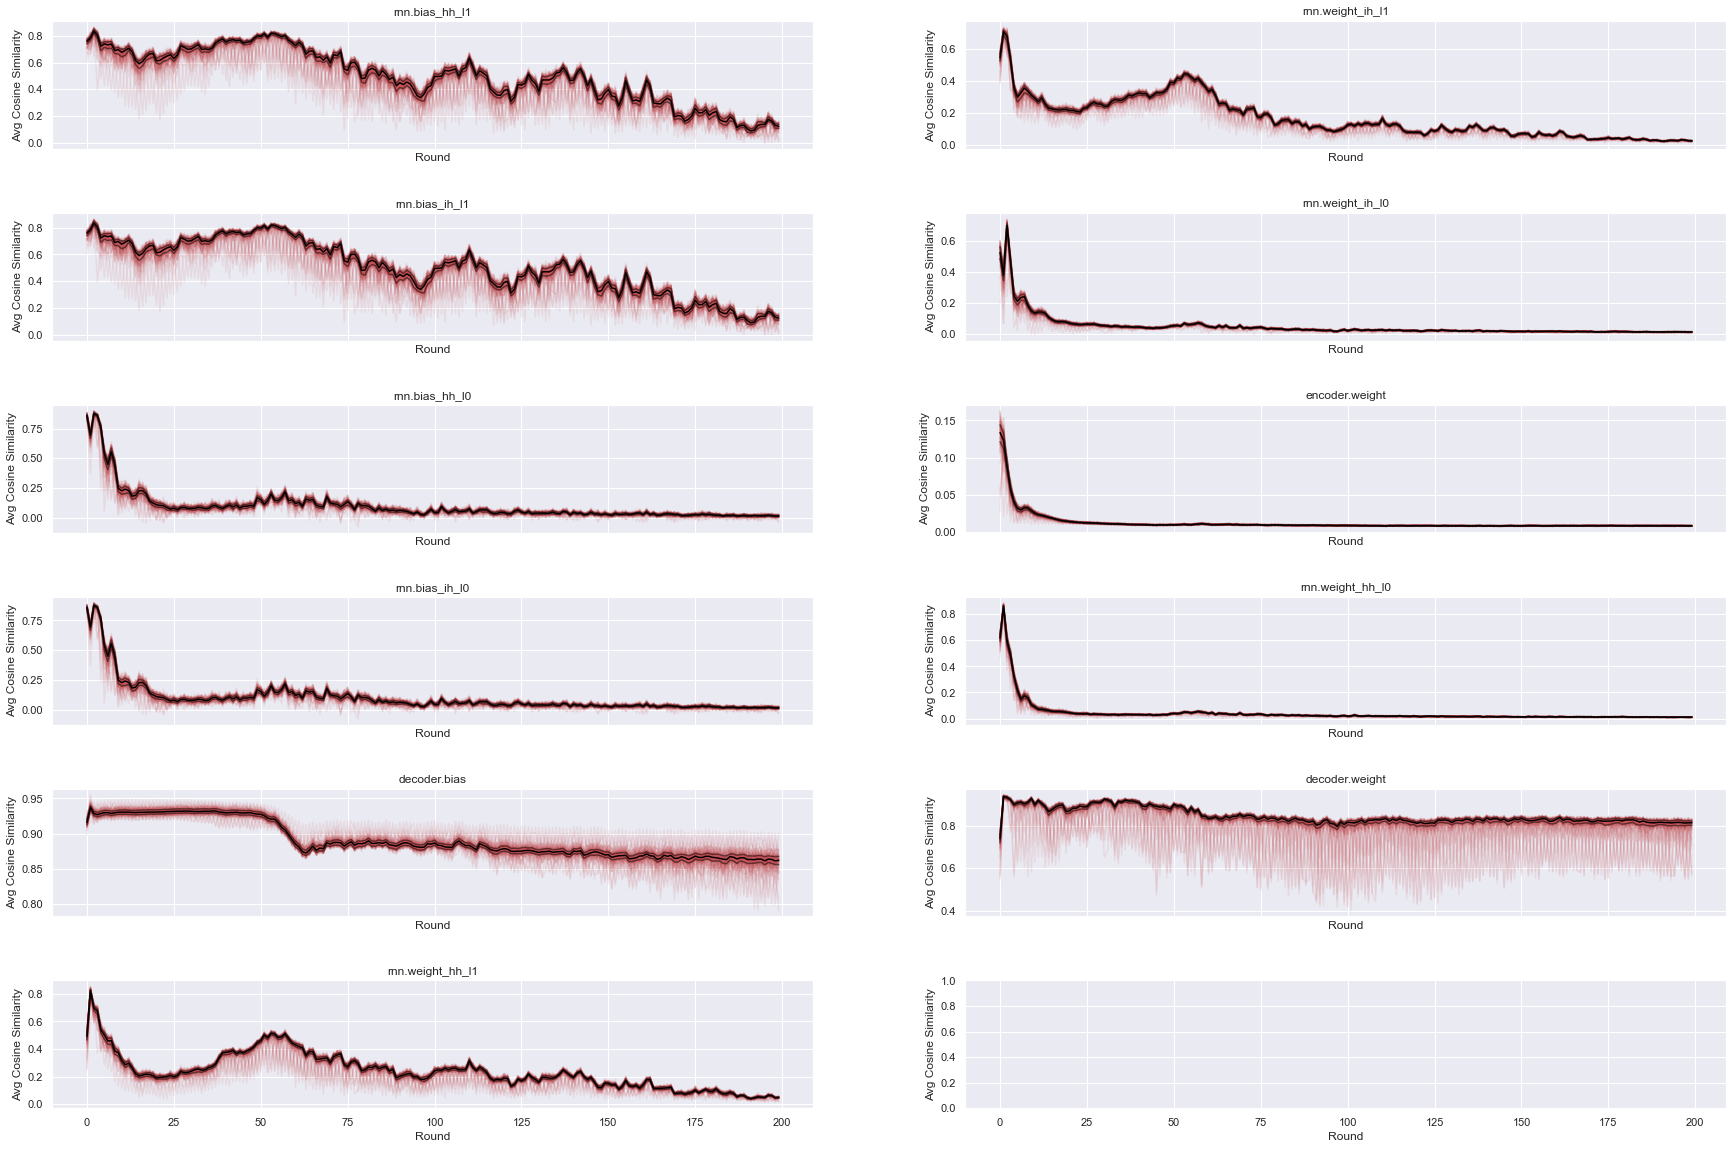

In [22]:
plot_cosine_similarity(E_5)